In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model

2024-01-24 21:16:28.276674: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-24 21:16:28.337012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
imgs_path = "./Train"
data = []
labels = []
CLASSES = 43
# using for loop to access each image
for i in range(CLASSES):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(imgs_path + '/' + str(i) + '/' + img)
        im = im.resize((32,32))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("data[0]: ",data[0])
print("labels[0: ]",labels[0])

data[0]:  [[[137  97  91]
  [178 113 117]
  [157  67  63]
  ...
  [176  60  41]
  [186 111  66]
  [247 230 225]]

 [[167 114 120]
  [169  89 110]
  [153  48  50]
  ...
  [155  68  46]
  [178 112  57]
  [248 215 188]]

 [[177 114 105]
  [165  75  77]
  [156  45  42]
  ...
  [180 121 102]
  [185 125  95]
  [248 186 183]]

 ...

 [[140 166 198]
  [116 134 166]
  [106 119 101]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[148 191 211]
  [116 149 165]
  [157 183 167]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[100 155 146]
  [ 73 102  86]
  [103 112 100]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
labels[0: ] 0


In [3]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_val.shape, y_val.shape)
# convert interge label to one-hot data
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

print(y_train[1])

training shape:  (31367, 32, 32, 3) (31367,)
testing shape:  (7842, 32, 32, 3) (7842,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
test = pd.read_csv("./Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "./"
test_imgs = test['Path'].values
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((32,32))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)

# Exploratory Data Analysis (EDA)

In [23]:
labels_df = pd.read_csv('GTSRB_label_names.csv')

In [24]:
labels_df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [34]:
labels_df["SignName"][9]

'No passing'

In [31]:
folders = os.listdir("./Train")
len(folders)

43

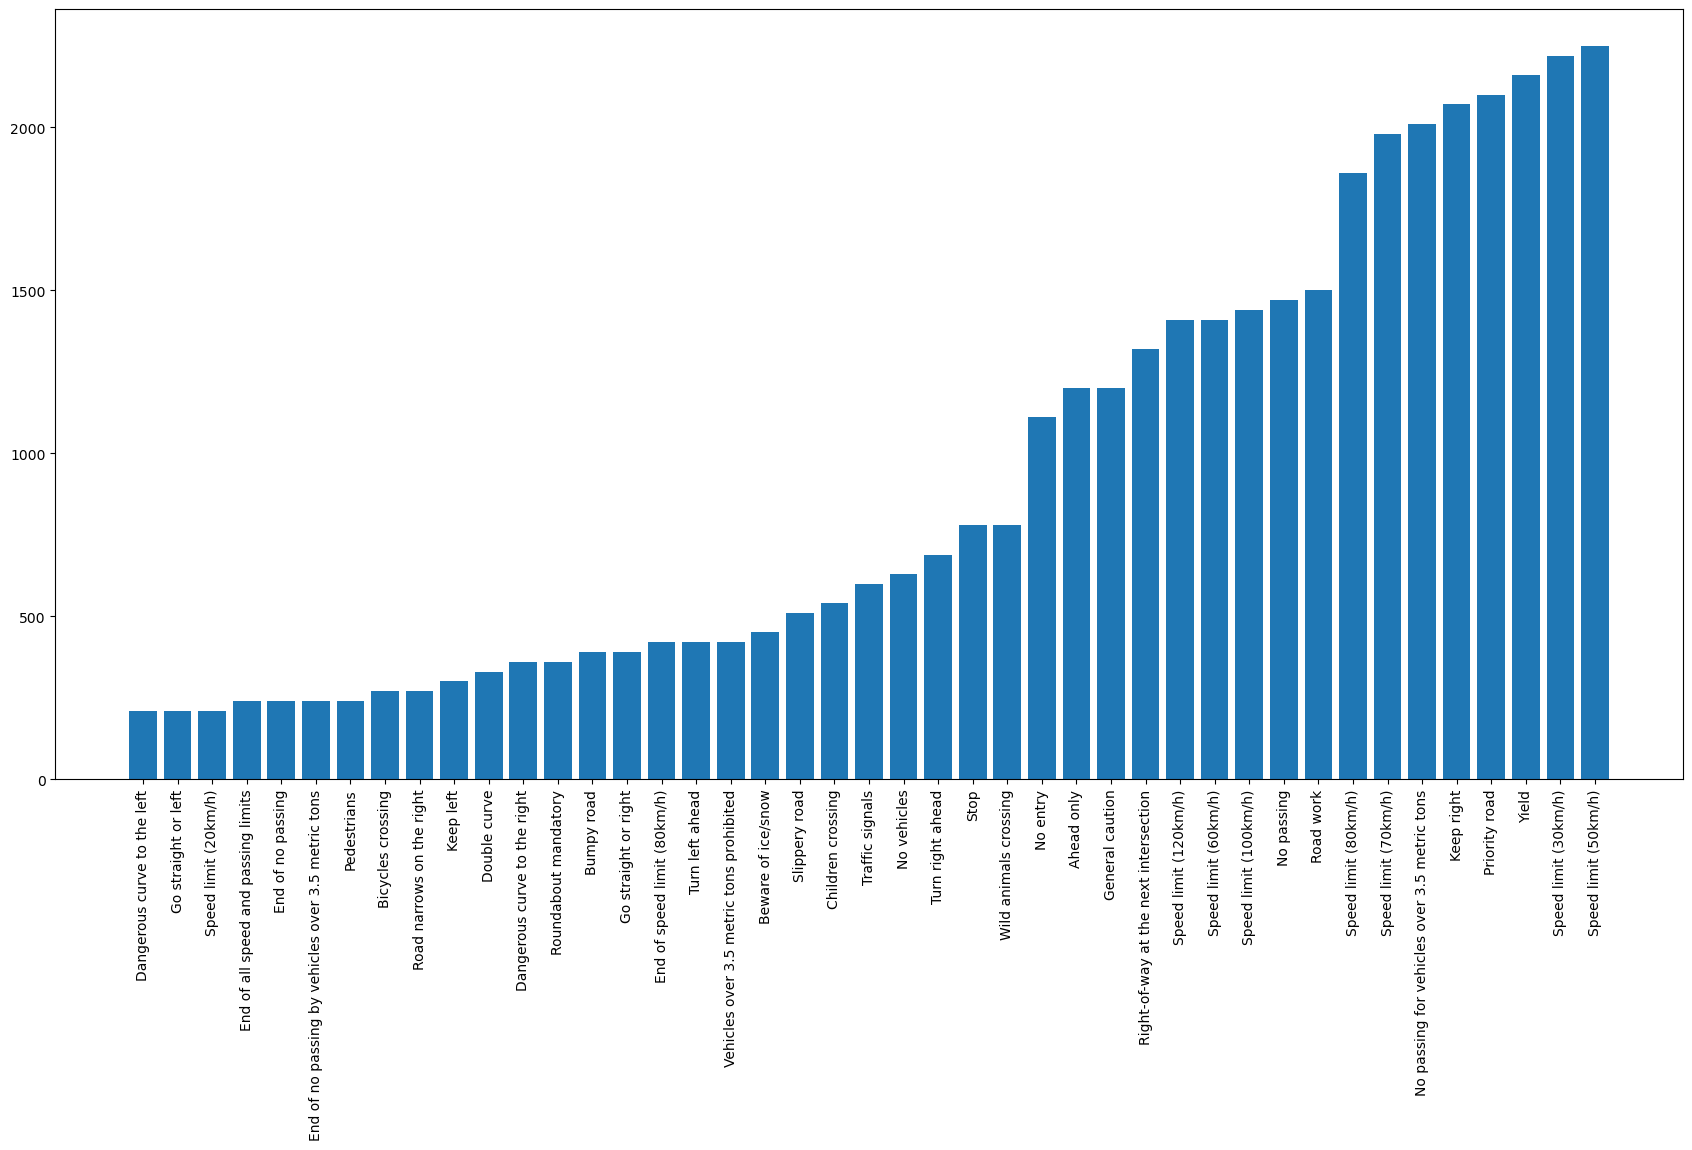

In [39]:
folders = os.listdir("./Train")

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir("./Train" + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(labels_df["SignName"][int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

<b> We see that:

(1) All classes have at least more than 200 samples.

(2) The class distribution is skewed, with a range of 210-2250. </b>

<b> Let's plot some images to get a feel for the dataset: </b>

The GTSRB dataset provides a "Meta" directory with idealized/cartoon versions of the traffic signs, which can help us understand what a training/test image is supposed to represent, since the training and test images contain various kinds of noise. Let us see all the traffic signs in the "Meta" folder:

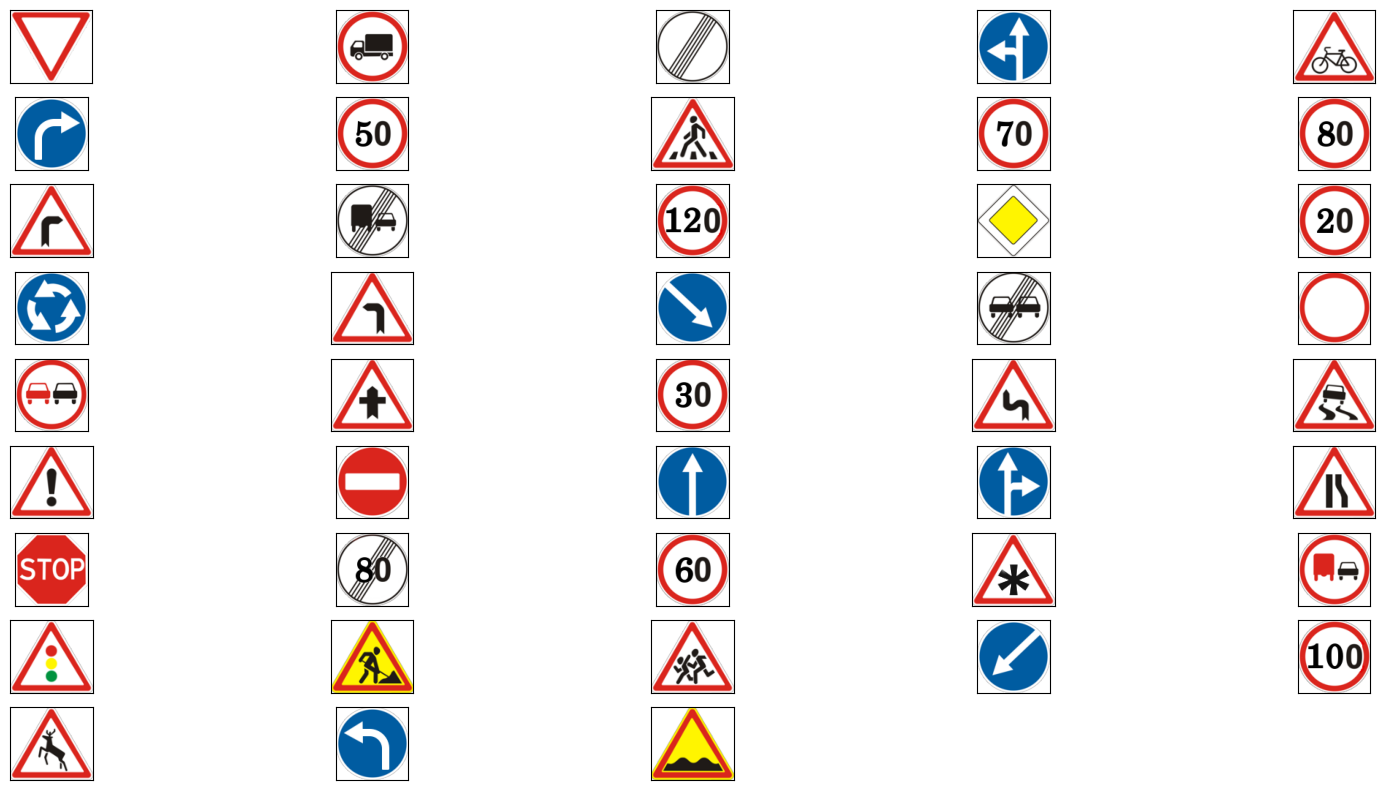

In [56]:
# Plot all images from Meta directory - idealized/cartoon versions of the signs

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('./Meta/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns) + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

In [87]:
from glob import glob
from pathlib import Path
import random

TRAIN_DIR = "./Train"
CLASSES = [folder[len(TRAIN_DIR) + 1:] for folder in glob(TRAIN_DIR + '/*')]

<b> Let us see one training example for each class: </b>

In [97]:
# Plot one example of a training sample for each class

def plot_one_sample_of_each(base_path):
    cols = 5
    rows = int(np.ceil(len(CLASSES) / cols))
    fig = plt.figure(figsize=(16, 20))
    
    for i in range(len(CLASSES)):
        cls = CLASSES[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        plt.imshow(plt.imread(imgs[0]))
        plt.title(cls)
        sp.axis('off')

    plt.show()
    return

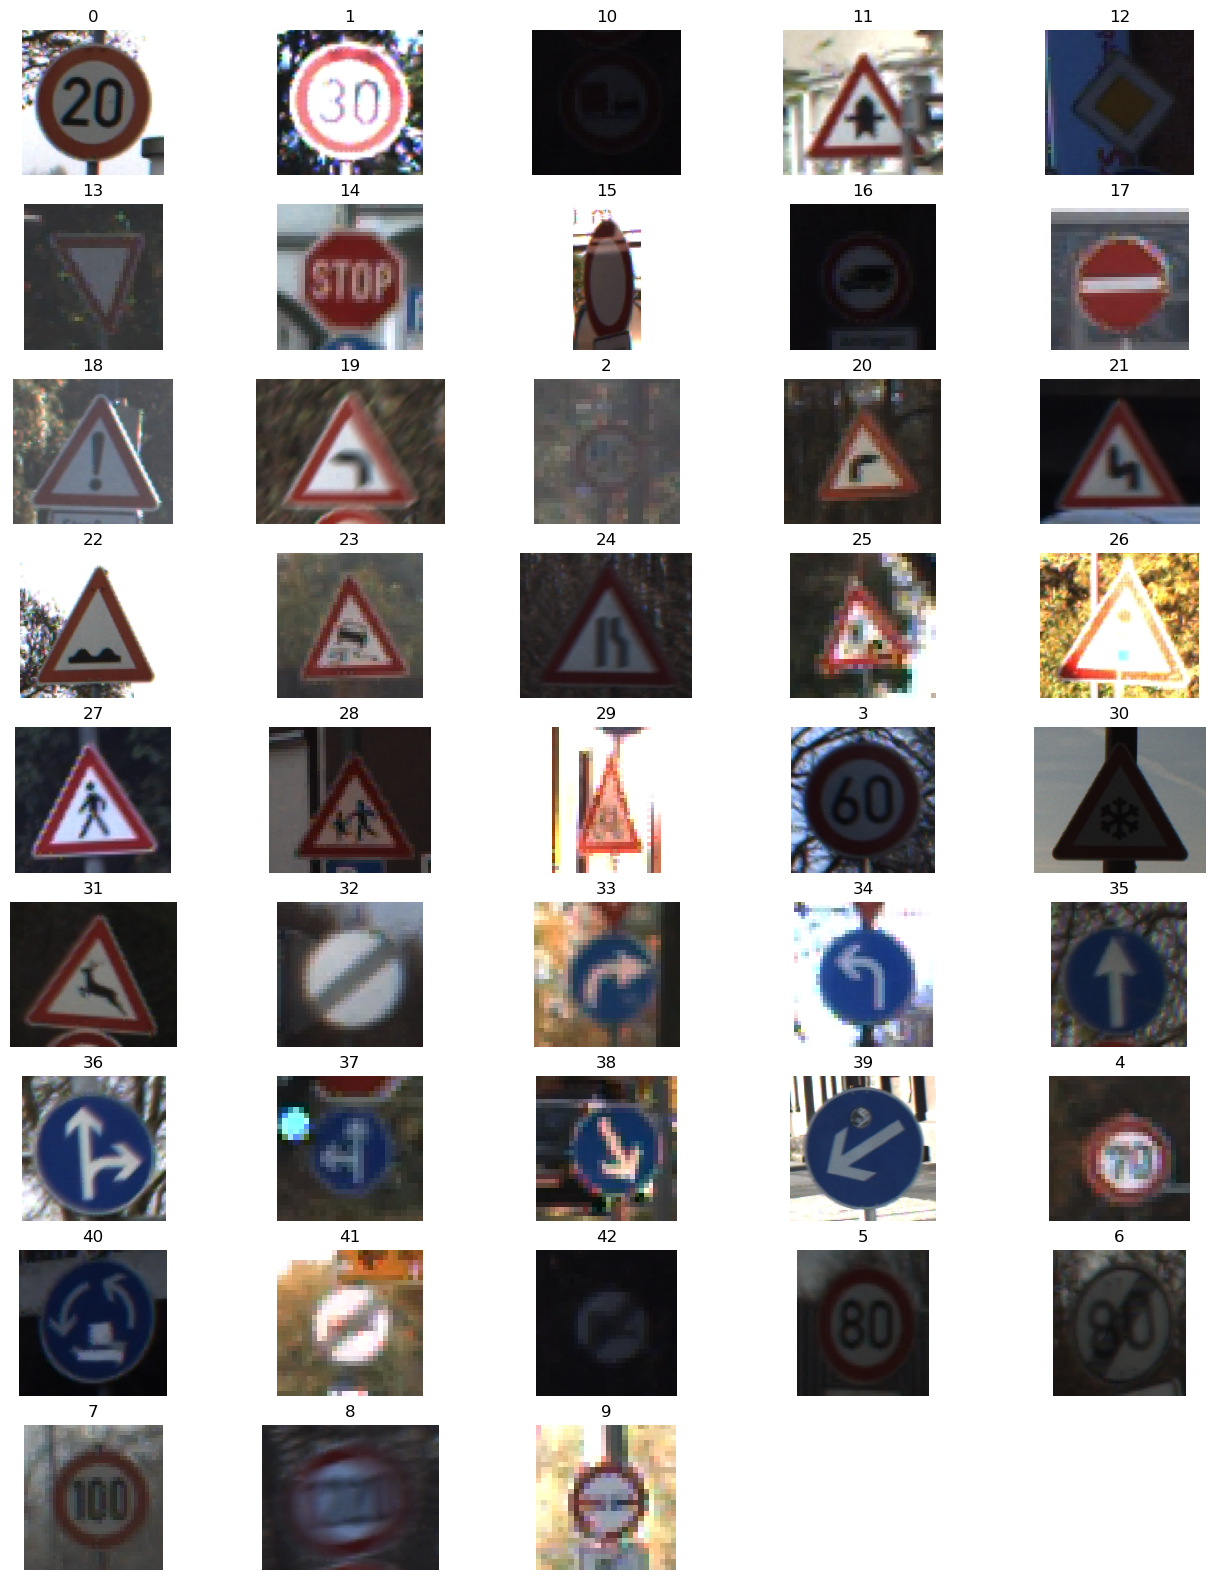

In [98]:
plot_one_sample_of_each(TRAIN_DIR)

<b> Clearly, the images to be classified often contain a lot of noise, but are recognizable for the most part. In cases which are less clear, we can refer to the idealized figures for clarity. </b>

# Baseline model: A Simple CNN (Convolutional Neural Network)

In [4]:
from tensorflow.keras import layers, models

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(43, activation='softmax')
])

In [5]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
981/981 [==============================] - 19s 18ms/step - loss: 2.5107 - accuracy: 0.3643
Epoch 2/10
981/981 [==============================] - 18s 18ms/step - loss: 1.0916 - accuracy: 0.7105
Epoch 3/10
981/981 [==============================] - 17s 18ms/step - loss: 0.6764 - accuracy: 0.8195
Epoch 4/10
981/981 [==============================] - 17s 18ms/step - loss: 0.4646 - accuracy: 0.8682
Epoch 5/10
981/981 [==============================] - 18s 18ms/step - loss: 0.3105 - accuracy: 0.9095
Epoch 6/10
981/981 [==============================] - 18s 18ms/step - loss: 0.2642 - accuracy: 0.9228
Epoch 7/10
981/981 [==============================] - 18s 18ms/step - loss: 0.1815 - accuracy: 0.9457
Epoch 8/10
981/981 [==============================] - 17s 18ms/step - loss: 0.1552 - accuracy: 0.9588
Epoch 9/10
981/981 [==============================] - 18s 18ms/step - loss: 0.1409 - accuracy: 0.9639
Epoch 10/10
981/981 [==============================] - 17s 18ms/step - loss: 0.106

In [7]:
from sklearn.metrics import accuracy_score

predictions = cnn.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("Accuracy on test datset using the baseline CNN: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 3s 6ms/step
Accuracy on test datset using the baseline CNN:  0.9087094220110847


In [8]:
cnn_old = cnn

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(43, activation="softmax")(x)
cnn = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
cnn.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [11]:
cnn.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
491/491 [==============================] - 19s 36ms/step - loss: 0.9116 - accuracy: 0.8266
Epoch 2/5
491/491 [==============================] - 18s 37ms/step - loss: 0.1269 - accuracy: 0.9700
Epoch 3/5
491/491 [==============================] - 18s 37ms/step - loss: 0.0769 - accuracy: 0.9834
Epoch 4/5
491/491 [==============================] - 17s 35ms/step - loss: 0.0679 - accuracy: 0.9866
Epoch 5/5
491/491 [==============================] - 15s 30ms/step - loss: 0.0605 - accuracy: 0.9887


In [12]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("./Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "./"
test_imgs = test['Path'].values
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((32,32))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = cnn.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("Accuracy on test datset using the baseline CNN: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 2s 6ms/step
Accuracy on test datset using the baseline CNN:  0.9470308788598575


In [13]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = cnn.fit(x_train, y_train, 
                    epochs=30, 
                    validation_data=(x_val, y_val), 
                    callbacks=callbacks)

Epoch 1/30
981/981 [==============================] - 21s 22ms/step - loss: 0.0984 - accuracy: 0.9847 - val_loss: 0.2456 - val_accuracy: 0.9762
Epoch 2/30
981/981 [==============================] - 23s 23ms/step - loss: 0.0922 - accuracy: 0.9869 - val_loss: 0.2051 - val_accuracy: 0.9837
Epoch 3/30
981/981 [==============================] - 23s 23ms/step - loss: 0.0923 - accuracy: 0.9883 - val_loss: 0.3038 - val_accuracy: 0.9712
Epoch 4/30
981/981 [==============================] - 23s 23ms/step - loss: 0.0883 - accuracy: 0.9898 - val_loss: 0.3033 - val_accuracy: 0.9818
Epoch 5/30
981/981 [==============================] - 23s 23ms/step - loss: 0.0817 - accuracy: 0.9916 - val_loss: 0.2959 - val_accuracy: 0.9834
Epoch 6/30
981/981 [==============================] - 24s 24ms/step - loss: 0.0895 - accuracy: 0.9921 - val_loss: 0.3248 - val_accuracy: 0.9828
Epoch 7/30
981/981 [==============================] - 23s 23ms/step - loss: 0.0972 - accuracy: 0.9918 - val_loss: 0.4173 - val_accuracy:

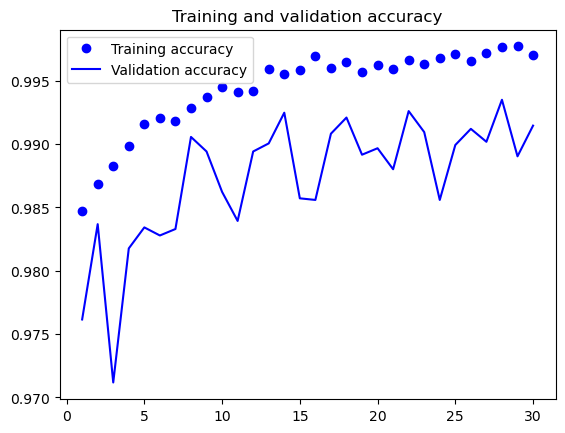

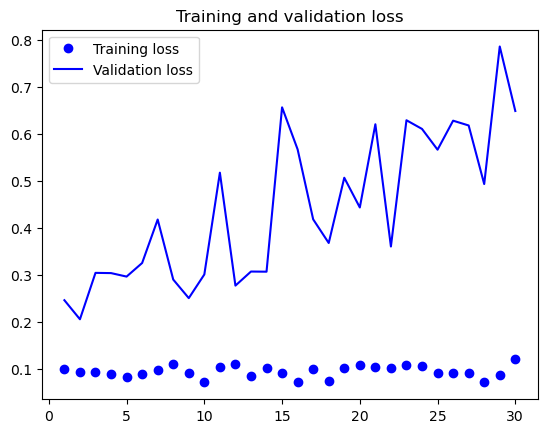

In [14]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [15]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
predictions = test_model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("Accuracy on test datset using CNN after hyperparameter tuning: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 3s 7ms/step
Accuracy on test datset using CNN after hyperparameter tuning:  0.9498020585906571


# Image Augmentation

In [16]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
layers.RandomHeight(0.1),
layers.RandomWidth(0.1)
]
)

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(43, activation="softmax")(x)
cnn_with_augmentation = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
cnn_with_augmentation.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [19]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_augmentation_30_epochs.keras",
save_best_only=True,
monitor="val_loss")
]

history = cnn_with_augmentation.fit(x_train, y_train, 
                    epochs=30, 
                    validation_data=(x_val, y_val), 
                    callbacks=callbacks)

Epoch 1/30
981/981 [==============================] - 24s 24ms/step - loss: 0.6485 - accuracy: 0.8656 - val_loss: 0.1408 - val_accuracy: 0.9665
Epoch 2/30
981/981 [==============================] - 23s 23ms/step - loss: 0.1491 - accuracy: 0.9712 - val_loss: 0.1653 - val_accuracy: 0.9680
Epoch 3/30
981/981 [==============================] - 23s 23ms/step - loss: 0.1258 - accuracy: 0.9788 - val_loss: 0.1677 - val_accuracy: 0.9760
Epoch 4/30
981/981 [==============================] - 21s 21ms/step - loss: 0.1100 - accuracy: 0.9826 - val_loss: 0.2677 - val_accuracy: 0.9537
Epoch 5/30
981/981 [==============================] - 18s 19ms/step - loss: 0.1017 - accuracy: 0.9861 - val_loss: 0.1537 - val_accuracy: 0.9825
Epoch 6/30
981/981 [==============================] - 20s 20ms/step - loss: 0.1078 - accuracy: 0.9857 - val_loss: 0.2430 - val_accuracy: 0.9686
Epoch 7/30
981/981 [==============================] - 23s 23ms/step - loss: 0.1067 - accuracy: 0.9867 - val_loss: 0.1693 - val_accuracy:

In [20]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation_30_epochs.keras")
predictions = test_model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("Accuracy on test dataset using CNN after augmentation & hyperparameter tuning: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 3s 7ms/step
Accuracy on test datset using CNN after augmentation & hyperparameter tuning:  0.9214568487727632


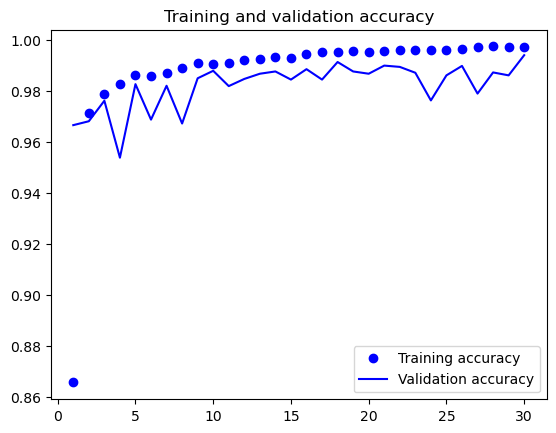

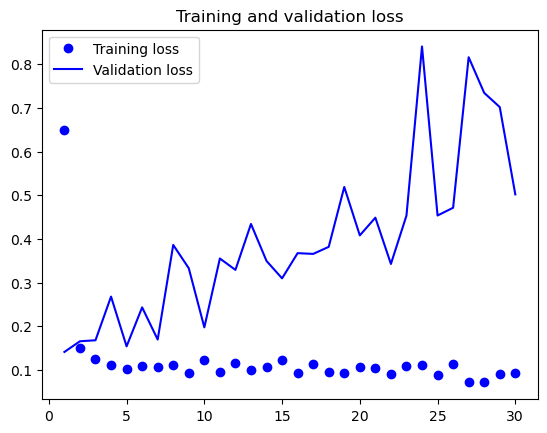

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Using dropout layers for regularization (to prevent overfitting)

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(43, activation="softmax")(x)
cnn_with_dropout = keras.Model(inputs=inputs, outputs=outputs)

In [103]:
cnn_with_dropout.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [104]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_a_dropout_layer.keras",
save_best_only=True,
monitor="val_loss")
]

history = cnn_with_dropout.fit(x_train, y_train, 
                    epochs=30, 
                    validation_data=(x_val, y_val), 
                    callbacks=callbacks)

Epoch 1/30
981/981 [==============================] - 12s 11ms/step - loss: 0.2259 - accuracy: 0.9876 - val_loss: 0.2521 - val_accuracy: 0.9898
Epoch 2/30
981/981 [==============================] - 11s 11ms/step - loss: 0.1686 - accuracy: 0.9902 - val_loss: 0.2105 - val_accuracy: 0.9912
Epoch 3/30
981/981 [==============================] - 11s 11ms/step - loss: 0.2034 - accuracy: 0.9896 - val_loss: 0.1806 - val_accuracy: 0.9943
Epoch 4/30
981/981 [==============================] - 11s 11ms/step - loss: 0.1638 - accuracy: 0.9901 - val_loss: 0.1752 - val_accuracy: 0.9932
Epoch 5/30
981/981 [==============================] - 11s 11ms/step - loss: 0.2215 - accuracy: 0.9888 - val_loss: 0.2479 - val_accuracy: 0.9920
Epoch 6/30
981/981 [==============================] - 11s 11ms/step - loss: 0.1982 - accuracy: 0.9905 - val_loss: 0.2228 - val_accuracy: 0.9926
Epoch 7/30
981/981 [==============================] - 11s 11ms/step - loss: 0.2158 - accuracy: 0.9897 - val_loss: 0.2539 - val_accuracy:

In [105]:
test_model = keras.models.load_model("convnet_from_scratch_with_a_dropout_layer.keras")
predictions = test_model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]


print("Accuracy on test dataset using a CNN with a dropout layer right before the densely connected classifier: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 1s 3ms/step
Accuracy on test dataset using a CNN with a dropout layer right before the densely connected classifier:  0.9665083135391924


In [106]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(43, activation="softmax")(x)
cnn_with_3_dropout_layers = keras.Model(inputs=inputs, outputs=outputs)

In [107]:
cnn_with_3_dropout_layers.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [108]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_3_dropout_layers.keras",
save_best_only=True,
monitor="val_loss")
]

history = cnn_with_3_dropout_layers.fit(x_train, y_train, 
                    epochs=30, 
                    validation_data=(x_val, y_val), 
                    callbacks=callbacks)

Epoch 1/30
981/981 [==============================] - 14s 14ms/step - loss: 2.0391 - accuracy: 0.5180 - val_loss: 0.2961 - val_accuracy: 0.9272
Epoch 2/30
981/981 [==============================] - 13s 13ms/step - loss: 0.5880 - accuracy: 0.8416 - val_loss: 0.3896 - val_accuracy: 0.8910
Epoch 3/30
981/981 [==============================] - 13s 13ms/step - loss: 0.4588 - accuracy: 0.8856 - val_loss: 0.1187 - val_accuracy: 0.9700
Epoch 4/30
981/981 [==============================] - 13s 14ms/step - loss: 0.4441 - accuracy: 0.8988 - val_loss: 0.0761 - val_accuracy: 0.9809
Epoch 5/30
981/981 [==============================] - 13s 13ms/step - loss: 0.4304 - accuracy: 0.9065 - val_loss: 0.0920 - val_accuracy: 0.9745
Epoch 6/30
981/981 [==============================] - 13s 13ms/step - loss: 0.4440 - accuracy: 0.9075 - val_loss: 0.1113 - val_accuracy: 0.9745
Epoch 7/30
981/981 [==============================] - 13s 14ms/step - loss: 0.4294 - accuracy: 0.9122 - val_loss: 0.1953 - val_accuracy:

In [109]:
test_model = keras.models.load_model("convnet_from_scratch_with_3_dropout_layers.keras")
predictions = test_model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("Accuracy on test dataset using a CNN with 3 dropout layers: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 1s 3ms/step
Accuracy on test dataset using a CNN with 3 dropout layers:  0.9478226444972289
